# LOGIN

In [12]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
driver = webdriver.Chrome(executable_path = 'C:/python/Chromedriver.exe')
driver.get('https://www.instagram.com/')
def login():             #function to login into instagram
    wait = WebDriverWait(driver, 10)
    username = wait.until(EC.presence_of_element_located((By.NAME, 'username')))        #getting the username box
    username.send_keys("SAMPLE USERNAME")                      #pass your username
    password=driver.find_element_by_name("password")                                        #getting the password box
    password.send_keys("SAMPLE PASSWORD")                   #pass your password
    login=driver.find_element_by_xpath("//*[@id='loginForm']/div/div[3]/button/div")        #getting the login button
    login.submit()                                                                         #clicking the login button
login()                                                                                       

# 1

# Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

# Q1.1
# From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [22]:
from bs4 import BeautifulSoup
base='https://www.instagram.com'
import time
search=driver.find_element_by_class_name("XTCLo")     #class name of search box
search.clear()
search.send_keys("foods")                              #sending foods in the search key
wait = WebDriverWait(driver, 10)                       
drp_dwn = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'yCE8d')))  #class name for dropdown 
arr=[]
count=0
for i in drp_dwn:
    if(count==10):              #to have count in number of handles (<=10)             
        break
    j=(i.get_attribute("href"))                #getting the urls of each handles
    if ('explore' in j) or ('tags' in j):      #ignoring hashtags
        continue
    arr.append(j)
    count+=1
rows=[]
for m in arr:                   #iterating over the urls of handles
    driver.get(m)
    p=m.split("/")
    time.sleep(2)
    ele=driver.find_elements_by_class_name("g47SY")     #class having the votes count in it
    l=(ele[1].get_attribute("innerHTML"))
    x=(l.replace(",", ""))                    #replacing ',' from the vote
    x=x.replace('k','000')                  #replacing k with 000
    x=x.replace('m','000000')               #replacing m with 000000
    if "." in x:
        x=int(x.replace('.',''))            #converting votes into int
        x=int(x/10)                         #dividing with 10 to remove the decimal point
    rows.append([p[3],int(x),m])

import pandas as pd 
df = pd.DataFrame(rows, columns = ['Handles', 'Votes','link']) 
df.head(10)
df = df.sort_values(by ='Votes',ascending=False)
df=df.reset_index(drop=True)
df=df.head(5)
df




,Handles,Votes,link
0,wholefoods,3100000,https://www.instagram.com/wholefoods/
1,_foodstories_,1000000,https://www.instagram.com/_foodstories_/
2,bestfoodsasmr,150000,https://www.instagram.com/bestfoodsasmr/
3,foodstirs,138000,https://www.instagram.com/foodstirs/
4,gh_foods,107000,https://www.instagram.com/gh_foods/


# Q1.2
# Now Find the number of posts these handles have done in the previous 3 days.

In [91]:
from bs4 import BeautifulSoup
base='https://www.instagram.com'
Handles=df['Handles'].values          #taking top 5 handles from the last questions
Handles_links=df['link'].values       #taking link from the the last questions
Handles_index=0
posts_counts=[]
for i in Handles_links:                   #iterating over the each handles links
    count=0                             #variable to have count on number of recents posts
    posts=[] 
    driver.get(i)
    driver.execute_script('window.scrollBy(0,1000);')         #scrolling the screen to have atleast 45-50 posts
    base='https://www.instagram.com' 
    e=driver.find_elements_by_class_name('v1Nh3')           #class for each posts
    for j in e:
        source=j.get_attribute('innerHTML')              #getting the urls of each posts
        data=BeautifulSoup(source, 'html')               #parsing using beautifulsoup
        posts.append(base+data.a['href'])
    for k in posts:                            #iterating over each posts
        driver.get(k)                                
        e=driver.find_element_by_class_name('_1o9PC')       #class having the data of time
        m=e.get_attribute('innerHTML')
        if 'days' in m:
            e=m.split(' ')
            if (e[0]=='3') or (e[0]=='2') or (e[0]=='1'):
                count+=1
        if 'hours' in m:
            count+=1
        if 'minutes' in m:
            count+=1
        if 'seconds' in m:
            count+=1
    print(Handles[Handles_index],'------->',count,'posts')
    posts_counts.append(count)
    Handles_index+=1
    
    

wholefoods -------> 1 posts
_foodstories_ -------> 3 posts
bestfoodsasmr -------> 6 posts
foodstirs -------> 3 posts
gh_foods -------> 7 posts


# Q1.3
# Depict this information using a suitable graph.

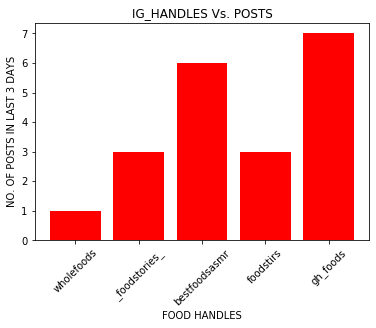

In [92]:
plt.bar(Handles,posts_counts,color="Red")
plt.title("IG_HANDLES Vs. POSTS")
plt.xlabel("FOOD HANDLES")
plt.ylabel("NO. OF POSTS IN LAST 3 DAYS")
plt.xticks(rotation=45)
plt.show()

# Q2

# Q2.1
# Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [23]:
from bs4 import BeautifulSoup
arr=df['link'].values          #taking links of top 5 handles from the 1st questions
dict_hashtags={}
for i in arr:              #iterating over the handles
    driver.get(i)
    base='https://www.instagram.com'
    e=driver.find_elements_by_class_name('v1Nh3')        #classes for each posts
    count=0
    posts=[]
    for j in e:
        if(count==10):                         #to have count so to not cross 10 posts
            break
        source=j.get_attribute('innerHTML')
        data=BeautifulSoup(source, 'html')              #parsing HTML content using beautifulsoup
        posts.append(base+data.a['href'])
        count+=1
    for k in posts:                     #iterating over the posts
        driver.get(k)
        e=driver.find_elements_by_class_name('xil3i')           #class for collecting hashtags    
        for i in e:
            m=(i.get_attribute('href'))
            if(m==''):
                continue
            p=m.split('/')
            print('#',p[-2],end='')                    #getting and printing the hashtags
            if p[-2] in dict_hashtags:
                dict_hashtags[p[-2]]=dict_hashtags[p[-2]]+1     #storing hastags in the Dictionary for the next questions
            else:
                dict_hashtags[p[-2]]=1

# linkinbio# govegan# lestweforget# remembranceday# canada# ourfoodstories# gatheringslikethese# christmasdecor# christmasdecorations# christmasdecorating# tabledecor# tabledecoration# flowerinstallation# foodstylist# foodphotographer# germanfoodblogger# momentslikethese# foodvide# ourfoodstories_travel# kitcheninspiration# kitcheninspo# devolkitchens# bertazzoni# bertazzoniprofessionalseries# kalklitir# kalklitircalce# kitcheninterior# kitchendesign# vogueliving# scandinavianhome# scandinavianstyle# haberdashery# interior_and_living# interiorinspo# kitcheninterior# kitchendecor# ourfoodstories# christmasdecorations# christmasmenu# vegetarisch# vegetariancooking# vegetarianchristmas# fellowmag# momentslikethese# winterrecipes# foodphotographer# foodstylist# germanfoodblogger# simplejoys# ourfoodstories# gatheringslikethese# fellowmag# simplejoys# onthetable# foodstylist# foodphotographer# germanfoodblogger# momentslikethese# countrysideliving# dutchbaby# glutenfreefood# glutenfreerecip

# yumny# ghanafoods# ghanafood# ghanafoodnetwork# ghana# ghanagirls# ghanacuisine# ghanafoodies# ghanafoodie# ghanalife# ghana%F0%9F%87%AC%F0%9F%87%AD# ghanaianfood# ghanaianfoodie# ghanastyle# ghfoods# accrafoodie# accraghana%F0%9F%87%AC%F0%9F%87%AD# temaghana# africancuisine# westafricanfood# ghanafoods# ghanafood# ghanafoodnetwork# ghana# ghanagirls# ghanacuisine# ghanafoodies# ghanafoodie# ghanalife# ghana%F0%9F%87%AC%F0%9F%87%AD# ghanaianfood# ghanaianfoodie# ghanastyle# ghfoods# accrafoodie# accraghana%F0%9F%87%AC%F0%9F%87%AD# temaghana# africancuisine# westafricanfood

# Q2.2
# Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [24]:
for i in dict_hashtags:                           #printing the hashtags with their frequency
    print(i,'--->',dict_hashtags[i])

linkinbio ---> 1
govegan ---> 1
lestweforget ---> 1
remembranceday ---> 1
canada ---> 1
ourfoodstories ---> 4
gatheringslikethese ---> 6
christmasdecor ---> 3
christmasdecorations ---> 3
christmasdecorating ---> 2
tabledecor ---> 5
tabledecoration ---> 3
flowerinstallation ---> 1
foodstylist ---> 9
foodphotographer ---> 9
germanfoodblogger ---> 9
momentslikethese ---> 8
foodvide ---> 1
ourfoodstories_travel ---> 1
kitcheninspiration ---> 1
kitcheninspo ---> 1
devolkitchens ---> 1
bertazzoni ---> 1
bertazzoniprofessionalseries ---> 1
kalklitir ---> 1
kalklitircalce ---> 1
kitcheninterior ---> 2
kitchendesign ---> 1
vogueliving ---> 1
scandinavianhome ---> 1
scandinavianstyle ---> 1
haberdashery ---> 1
interior_and_living ---> 1
interiorinspo ---> 1
kitchendecor ---> 1
christmasmenu ---> 3
vegetarisch ---> 1
vegetariancooking ---> 1
vegetarianchristmas ---> 3
fellowmag ---> 7
winterrecipes ---> 1
simplejoys ---> 4
onthetable ---> 2
countrysideliving ---> 2
dutchbaby ---> 1
glutenfreefood

# Q2.3
# Create a csv file with two columns : the word and its frequency

In [25]:
import csv
column_name=['Hashtags','Frequency']            #making a csv file having data of Hashtags and it's frequency
rows=[]
for i in dict_hashtags:
    rows.append([i,dict_hashtags[i]])
filename = "Hashtag_frequency.csv"
with open(filename, 'w') as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)  
        
    # writing the fields  
    csvwriter.writerow(column_name)  
        
    # writing the data rows  
    csvwriter.writerows(rows)
import pandas as pd

df2 = pd.read_csv (r'Hashtag_frequency.csv')                        #reading the csv file with pandas dataframe
df2

,Hashtags,Frequency
0,linkinbio,1
1,govegan,1
2,lestweforget,1
3,remembranceday,1
4,canada,1
...,...,...
264,teamemoney,1
265,welovenigerianweddings,1
266,naijacelebrity,1
267,bhfyp,1


# Q2.4
# Now, find the hashtags that were most popular among these bloggers

In [26]:
import operator
Sorted_hashtags = sorted(dict_hashtags.items(), key=operator.itemgetter(1),reverse=True) #sorting the hashtags dictionary
count=0
for i in Sorted_hashtags:       #printing most popular hashtags
    if(count==10):          #printing the Top 10 hahtags
        break
    print(i)
    count+=1                                    

('asmr', 10)
('mukbang', 10)
('asmrmukbang', 10)
('eating', 10)
('eatingshow', 10)
('asmreating', 10)
('asmreatingsounds', 10)
('mouthsounds', 10)
('asmreatingshow', 10)
('eatingvideo', 10)


# Q2.5
# Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

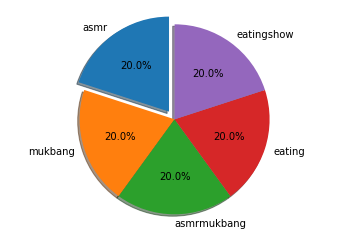

In [28]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = []
frequency=[]
count=0
for i in Sorted_hashtags:
    if(count==5):
        break
    labels.append(i[0])
    frequency.append(i[1])
    count+=1
explode = (0.1, 0, 0, 0,0)
fig1, ax1 = plt.subplots()
ax1.pie(frequency,explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Q3
# You need to also calculate average followers : likes ratio for the obtained handles.
# Followers : Likes ratio is calculated as follows:

# Q3.1
# Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [43]:
import time
Likes_rows=[]
for i in arr:
    b=(i).split('/')
    driver.get(i)
    posts=driver.find_elements_by_class_name('v1Nh3')         #class having data of each posts
    count=0
    a=[]
    for i in posts:               #iterating over the posts
        if(count==10):                 #to have counts on posts <=10
            break
        source=i.get_attribute('innerHTML')              
        base='https://www.instagram.com/'
        data=BeautifulSoup(source, 'html')
        hexa=(base+data.a['href'])             #getting the url of each posts
        a.append(hexa)                          #appending that post's url in the array a
        count+=1
    rows=[]
    sum=0
    for i in a:
        driver.get(i)
        e=driver.find_elements_by_class_name('sqdOP')        #class having the likes data
        likes=e[2].get_attribute('innerHTML')
        data=BeautifulSoup(likes, 'html')
        if 'likes' in data.text:
            likes=((data.text.split(' ')))
            likes=likes[0]
            if ',' in likes:
                likes=likes.replace(',','')
            sum=sum+int(likes)                         #adding the likes of of latest 10 posts
    Likes_rows.append([b[3],sum])
import pandas as pd 
df3 = pd.DataFrame(Likes_rows, columns = ['Handles', 'Likes']) 
df3                                                          #made a data frame showing Handles and it's corresponding likes
    

,Handles,Likes
0,wholefoods,34045
1,_foodstories_,96951
2,bestfoodsasmr,33454
3,foodstirs,434
4,gh_foods,6749


# Q 3.2
# Calculate the average likes for a handle.

In [44]:
df4=df3
df4['Likes']=df3['Likes']/10
df4 = df4.rename(columns = {'Likes':'Average Likes'})   #dataFrame showing the Handles and its corresponding average likes
df4

,Handles,Average Likes
0,wholefoods,3404.5
1,_foodstories_,9695.1
2,bestfoodsasmr,3345.4
3,foodstirs,43.4
4,gh_foods,674.9


# Q3.3
# Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [46]:
Followers=df['Votes'].values          #getting Votes list from the first question
df5=df4
df5['Followers']=df['Votes'].values
df5['Ratio']=df5['Followers']/df5['Average Likes']             #geting the ratio Followers: average likes
df5

,Handles,Average Likes,Followers,Ratio
0,wholefoods,3404.5,3100000,910.559554
1,_foodstories_,9695.1,1000000,103.144888
2,bestfoodsasmr,3345.4,150000,44.837688
3,foodstirs,43.4,138000,3179.723502
4,gh_foods,674.9,107000,158.542006


# Q3.4
# Create a bar graph to depict the above obtained information.

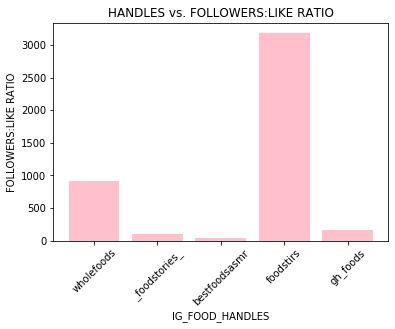

In [48]:
handles=df5["Handles"].values## getting handle names from final_list obtained in 1st question
numRatio=df5['Ratio'].values
plt.bar(handles,numRatio,color="pink")
plt.title("HANDLES vs. FOLLOWERS:LIKE RATIO")
plt.xlabel("IG_FOOD_HANDLES")
plt.ylabel("FOLLOWERS:LIKE RATIO")
plt.xticks(rotation=45)
plt.show()

In [93]:
driver.close()